In [1]:
# !pip3 install nltk
# !pip3 install Sastrawi
# !pip3 install wordcloud
import pandas as pd
import numpy as np
import os
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
pd.set_option('display.max_columns', 50)

## Load Key Norm into RAM

In [2]:
PATH_TO_KEY_NORM_FILE = './dictionary/key_norm.csv'

key_norm = pd.read_csv(PATH_TO_KEY_NORM_FILE).drop(['_id'], axis=1)
key_norm.head()

,singkat,hasil
0,abis,habis
1,accent,tekanan
2,accept,terima
3,accident,kecelakaan
4,achievement,prestasi


In [3]:
key_norm_dict = {key_norm['singkat'][i]:key_norm['hasil'][i] for i in range(len(key_norm))}
key_norm_dict

{'abis': 'habis',
 'accent': 'tekanan',
 'accept': 'terima',
 'accident': 'kecelakaan',
 'achievement': 'prestasi',
 'acra': 'acara',
 'acrany': 'acaranya',
 'acrnya': 'acaranya',
 'action': 'aksi',
 'active': 'aktif',
 'activity': 'aktivitas',
 'actually': 'sebenarnya',
 'actualy': 'sebenarnya',
 'ad': 'ada',
 'ade': 'ada',
 'adult': 'dewasa',
 'adventure': 'petualangan',
 'adventurer': 'petualang',
 'advice': 'nasehat',
 'after': 'setelah',
 'afternun': 'sore',
 'again': 'lagi',
 'agency': 'perwakilan',
 'agent': 'agen',
 'agk': 'agak',
 'agktn': 'angkatan',
 'agree': 'setuju',
 'agreement': 'persetujuan',
 'aing': 'saya',
 'aj': 'saja',
 'aja': 'saja',
 'ajah': 'saja',
 'aje': 'saja',
 'ajeh': 'saja',
 'ajk': 'ajak',
 'ak': 'saya',
 'akeh': 'banyak',
 'akhire': 'akhirnya',
 'aktifkn': 'aktifkan',
 'aku': 'saya',
 'alhamdlh': 'alhamdulillah',
 'alhamdulilah': 'alhamdulillah',
 'almost': 'hampir',
 'almt': 'alamat',
 'alone': 'sendiri',
 'alsn': 'alasan',
 'also': 'juga',
 'always': '

## Read Data

In [4]:
## Hard coded constants for locating the inputs
PATH_TO_NEW_SENTIMENT_FOLDER = './'
NEGATIVE_DATASET = PATH_TO_NEW_SENTIMENT_FOLDER + 'negative_tweet_temp.csv'
POSITIVE_DATASET = PATH_TO_NEW_SENTIMENT_FOLDER + 'positive_tweet_temp.csv'

In [5]:
negative_data = pd.read_csv(NEGATIVE_DATASET)
positive_data = pd.read_csv(POSITIVE_DATASET)

In [6]:
negative_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'conversation_id', 'created_at',
       'date', 'time', 'timezone', 'user_id', 'username', 'name', 'place',
       'tweet', 'mentions', 'urls', 'photos', 'replies_count',
       'retweets_count', 'likes_count', 'location', 'hashtags', 'link',
       'retweet', 'quote_url', 'video', 'profile_image_url'],
      dtype='object')

In [7]:
positive_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'conversation_id', 'created_at',
       'date', 'time', 'timezone', 'user_id', 'username', 'name', 'place',
       'tweet', 'mentions', 'urls', 'photos', 'replies_count',
       'retweets_count', 'likes_count', 'location', 'hashtags', 'link',
       'retweet', 'quote_url', 'video', 'profile_image_url'],
      dtype='object')

In [8]:
negative_data['is_depressed'] = True
print(negative_data.count())
negative_data.head()

Unnamed: 0           167
Unnamed: 0.1         119
id                   167
conversation_id      167
created_at           167
date                 167
time                 167
timezone             167
user_id              167
username             167
name                 167
place                  0
tweet                167
mentions              37
urls                 167
photos               167
replies_count        167
retweets_count       167
likes_count          167
location               0
hashtags             167
link                 167
retweet                0
quote_url              1
video                167
profile_image_url    167
is_depressed         167
dtype: int64


,Unnamed: 0,Unnamed: 0.1,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,location,hashtags,link,retweet,quote_url,video,profile_image_url,is_depressed
0,0,0.0,1127948727660961792,1127946700813770752,1557758907000,2019-05-13,21:48:27,WIB,1118865253305999360,xxdhean,BUNDANYA BYOUNGGON ☄,NaN,"Hari selasa babe YG bikin ""new line up"" gue mi...",NaN,[],[],1,0,0,NaN,[],https://twitter.com/xxdhean/status/11279487276...,NaN,NaN,0,https://pbs.twimg.com/profile_images/112698373...,True
1,1,3.0,1127896201230032896,1127896201230032896,1557746384000,2019-05-13,18:19:44,WIB,80029283,raishaula,Raisha Ula,NaN,Brgini ternyata rasanya percaya cerita masalah...,NaN,[],[],1,0,0,NaN,[],https://twitter.com/raishaula/status/112789620...,NaN,NaN,0,https://pbs.twimg.com/profile_images/110591067...,True
2,2,4.0,1127885187461697537,1127883684994899968,1557743758000,2019-05-13,17:35:58,WIB,710061963175309312,bung_tahu,Look,NaN,Ada ga ya twitternya bili... Pengen bilangin d...,['vivacoid'],[],[],0,0,0,NaN,[],https://twitter.com/Bung_tahu/status/112788518...,NaN,NaN,0,https://pbs.twimg.com/profile_images/112789651...,True
3,3,5.0,1127852789374144512,1127852789374144512,1557736034000,2019-05-13,15:27:14,WIB,2791266684,au_ah_elap06,GATAUAH,NaN,Gw sama kaya ka karin ngerti ttng depresi pas ...,NaN,['https://twitter.com/awkarin/status/112740051...,[],0,0,0,NaN,[],https://twitter.com/AU_AH_ELAP06/status/112785...,NaN,https://twitter.com/awkarin/status/11274005183...,0,https://pbs.twimg.com/profile_images/112251628...,True
4,4,6.0,1127793687516336129,1127793687516336129,1557721943000,2019-05-13,11:32:23,WIB,1047208017064689664,askfess,ASKFESS,NaN,#mnfs tb² pengen bunuh diri,NaN,[],[],25,0,5,NaN,['#mnfs'],https://twitter.com/askfess/status/11277936875...,NaN,NaN,0,https://pbs.twimg.com/profile_images/109586822...,True


In [9]:
positive_data['is_depressed'] = False
print(positive_data.count())
positive_data.head()

Unnamed: 0           209
Unnamed: 0.1         133
id                   209
conversation_id      209
created_at           209
date                 209
time                 209
timezone             209
user_id              209
username             209
name                 209
place                  0
tweet                209
mentions              84
urls                 209
photos               209
replies_count        209
retweets_count       209
likes_count          209
location               0
hashtags             209
link                 209
retweet                0
quote_url              2
video                209
profile_image_url    209
is_depressed         209
dtype: int64


,Unnamed: 0,Unnamed: 0.1,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,location,hashtags,link,retweet,quote_url,video,profile_image_url,is_depressed
0,0,1.0,1127935635400957954,1127935635400957954,1557755786000,2019-05-13,20:56:26,WIB,2262992802,mirza_husainiy,Mirza Quanta Ahady H,NaN,Disadari atau tidak Kadang apa yg kita lihat s...,NaN,[],[],0,0,0,NaN,[],https://twitter.com/mirza_husainiy/status/1127...,NaN,NaN,0,https://pbs.twimg.com/profile_images/896707936...,False
1,1,2.0,1127933327736881152,1127926425296617472,1557755235000,2019-05-13,20:47:15,WIB,839082153677725697,lvlia00,ʚ ʟɪᴀ ɞ,NaN,Huhu berasa liat orang diputusin pacar lewat t...,NaN,[],['https://pbs.twimg.com/media/D6c5YDlU0AA9ont....,1,0,0,NaN,[],https://twitter.com/LVLIA00/status/11279333277...,NaN,NaN,0,https://pbs.twimg.com/profile_images/112423003...,False
2,2,7.0,1127650851529453568,1127648432976326657,1557687888000,2019-05-13,02:04:48,WIB,1052774662801784832,yeacryn,obyn #MILLARDALEBACK #ADVISBACK,NaN,"jangan pernah menyerah yaaahh, sekalipun km bu...",['rpautobase'],[],[],0,0,0,NaN,[],https://twitter.com/yeacryn/status/11276508515...,NaN,NaN,0,https://pbs.twimg.com/profile_images/112784127...,False
3,3,24.0,1127262863112974338,1127210272848891905,1557595384000,2019-05-12,00:23:04,WIB,967450696692899840,sszc_01,Zasvicha,NaN,Pasti sudah ga bisa tidur tuh anak.. semoga aj...,"['hana_4taa', 'sirodjudin01', 'rizmawidiono', ...",[],[],5,3,16,NaN,[],https://twitter.com/SSZC_01/status/11272628631...,NaN,NaN,0,https://pbs.twimg.com/profile_images/104642351...,False
4,4,31.0,1126894271368314882,1126867496454082560,1557507505000,2019-05-10,23:58:25,WIB,3396925817,ayukurniasihh,🍩🍫🍞🍔🍗🍜🌭🍦🍨🍷🍶☕,NaN,jare pengen bunuh diri,['skkkrrrrttt'],[],[],1,0,0,NaN,[],https://twitter.com/ayukurniasihh/status/11268...,NaN,NaN,0,https://pbs.twimg.com/profile_images/112606534...,False


In [10]:
data = pd.DataFrame(positive_data,)
data = data.append(negative_data)
print(data.count())
data.head()

Unnamed: 0           376
Unnamed: 0.1         252
id                   376
conversation_id      376
created_at           376
date                 376
time                 376
timezone             376
user_id              376
username             376
name                 376
place                  0
tweet                376
mentions             121
urls                 376
photos               376
replies_count        376
retweets_count       376
likes_count          376
location               0
hashtags             376
link                 376
retweet                0
quote_url              3
video                376
profile_image_url    376
is_depressed         376
dtype: int64


,Unnamed: 0,Unnamed: 0.1,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,location,hashtags,link,retweet,quote_url,video,profile_image_url,is_depressed
0,0,1.0,1127935635400957954,1127935635400957954,1557755786000,2019-05-13,20:56:26,WIB,2262992802,mirza_husainiy,Mirza Quanta Ahady H,NaN,Disadari atau tidak Kadang apa yg kita lihat s...,NaN,[],[],0,0,0,NaN,[],https://twitter.com/mirza_husainiy/status/1127...,NaN,NaN,0,https://pbs.twimg.com/profile_images/896707936...,False
1,1,2.0,1127933327736881152,1127926425296617472,1557755235000,2019-05-13,20:47:15,WIB,839082153677725697,lvlia00,ʚ ʟɪᴀ ɞ,NaN,Huhu berasa liat orang diputusin pacar lewat t...,NaN,[],['https://pbs.twimg.com/media/D6c5YDlU0AA9ont....,1,0,0,NaN,[],https://twitter.com/LVLIA00/status/11279333277...,NaN,NaN,0,https://pbs.twimg.com/profile_images/112423003...,False
2,2,7.0,1127650851529453568,1127648432976326657,1557687888000,2019-05-13,02:04:48,WIB,1052774662801784832,yeacryn,obyn #MILLARDALEBACK #ADVISBACK,NaN,"jangan pernah menyerah yaaahh, sekalipun km bu...",['rpautobase'],[],[],0,0,0,NaN,[],https://twitter.com/yeacryn/status/11276508515...,NaN,NaN,0,https://pbs.twimg.com/profile_images/112784127...,False
3,3,24.0,1127262863112974338,1127210272848891905,1557595384000,2019-05-12,00:23:04,WIB,967450696692899840,sszc_01,Zasvicha,NaN,Pasti sudah ga bisa tidur tuh anak.. semoga aj...,"['hana_4taa', 'sirodjudin01', 'rizmawidiono', ...",[],[],5,3,16,NaN,[],https://twitter.com/SSZC_01/status/11272628631...,NaN,NaN,0,https://pbs.twimg.com/profile_images/104642351...,False
4,4,31.0,1126894271368314882,1126867496454082560,1557507505000,2019-05-10,23:58:25,WIB,3396925817,ayukurniasihh,🍩🍫🍞🍔🍗🍜🌭🍦🍨🍷🍶☕,NaN,jare pengen bunuh diri,['skkkrrrrttt'],[],[],1,0,0,NaN,[],https://twitter.com/ayukurniasihh/status/11268...,NaN,NaN,0,https://pbs.twimg.com/profile_images/112606534...,False


## Preprocessing Data

In [12]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize

import re

stop_factory = StopWordRemoverFactory()
more_stopword = ['dengan', 'ia','bahwa','oleh']
 
# Tambahkan Stopword Baru
stop_words = stop_factory.get_stop_words()+more_stopword

# Create StopWord Removal using our own Stop words
stop_word_remover = StopWordRemover(ArrayDictionary(stop_words))

# Create stemmer
stemmer = StemmerFactory().create_stemmer()

def formalize(word):
    if word in key_norm_dict:
        return key_norm_dict[word]
    return word

def preprocess_tweet(tweet, debug = False):
    if debug: print(tweet, end="\n\n")
    
    # Lower casing
    clean_tweet = tweet.lower() #lowercase
    
    # URL Removal and Username removal
    clean_tweet = re.sub(r"(?:\@|https?\://)\S+", " ", clean_tweet)
    if debug: print('After URL and username removal: ', clean_tweet, end="\n\n")
    
    # Punctuation removal
    clean_tweet = re.sub(r'[^\w\s]',' ',clean_tweet)
    if debug: print('After punctuation removal: ', clean_tweet, end="\n\n")
    
    # Extra space removal
    clean_tweet = re.sub('\s+', ' ', clean_tweet)
    if debug: print('After extra space removal: ', clean_tweet, end="\n\n")
    
     # Trimming
    clean_tweet = clean_tweet.strip()
    if debug: print('After trimming: ', clean_tweet)
         
    # Transforming informal words to formal words
    clean_tweet = " ".join([formalize(word) for word in word_tokenize(clean_tweet)])
    if debug: print('After transofrming informal words: ', clean_tweet, end="\n\n")
     
    # Stop words removal
    clean_tweet = stop_word_remover.remove(clean_tweet)
    if debug: print('After stop words removal: ', clean_tweet, end="\n\n")
    
    # Stemming
    clean_tweet = stemmer.stem(clean_tweet)
    if debug: print('After stemming: ', clean_tweet, end="\n\n")
    
    if debug: print()
    
    return clean_tweet

In [13]:
cleaned = []
for idx, tweet in enumerate(data['tweet']):
    print('{}/{}'.format(idx, len(data['tweet'])))
    cleaned.append(preprocess_tweet(tweet, True))
    print()
    
cleaned

0/376
Disadari atau tidak Kadang apa yg kita lihat sebagai “kerusakan” / penyimpangan itu sebenarnya karena ulah kita sendiri  Kita boleh sedih sampe pengen bunuh diri Apa dengan gitu selesai?  Bangkit lah Itu hanya sebagian kecil kehidupan Yo ngono kui urip 😅 seru kan?
After URL and username removal:  disadari atau tidak kadang apa yg kita lihat sebagai “kerusakan” / penyimpangan itu sebenarnya karena ulah kita sendiri  kita boleh sedih sampe pengen bunuh diri apa dengan gitu selesai?  bangkit lah itu hanya sebagian kecil kehidupan yo ngono kui urip 😅 seru kan?

After punctuation removal:  disadari atau tidak kadang apa yg kita lihat sebagai  kerusakan    penyimpangan itu sebenarnya karena ulah kita sendiri  kita boleh sedih sampe pengen bunuh diri apa dengan gitu selesai   bangkit lah itu hanya sebagian kecil kehidupan yo ngono kui urip   seru kan 

After extra space removal:  disadari atau tidak kadang apa yg kita lihat sebagai kerusakan penyimpangan itu sebenarnya karena ulah kita 

After stemming:  pat temenku tau tiap ngobrol sering nyinggung2 ingin bunuh diri beneran tidak sih kalau lihat baik2 tapi sering ngomong dia ingin bunuh diri



8/376
tangkap..  jgn pernah diliput media,pengen terkenal dgn cara bunuh diri.kaya pelaku BOM saja nih org dah gelap mata tuk raih tujuan .inget ye  ..surat alfathir ayat 43 Rencana jahat takan menimpa kecuali yg mrncanakanya sendiri
After URL and username removal:  tangkap..  jgn pernah diliput media,pengen terkenal dgn cara bunuh diri.kaya pelaku bom saja nih org dah gelap mata tuk raih tujuan .inget ye  ..surat alfathir ayat 43 rencana jahat takan menimpa kecuali yg mrncanakanya sendiri

After punctuation removal:  tangkap    jgn pernah diliput media pengen terkenal dgn cara bunuh diri kaya pelaku bom saja nih org dah gelap mata tuk raih tujuan  inget ye    surat alfathir ayat 43 rencana jahat takan menimpa kecuali yg mrncanakanya sendiri

After extra space removal:  tangkap jgn pernah diliput media pengen terkenal dgn cara 

After stemming:  jaman sekarang teroris kejahatanya bukan teror kaya bom bunuh diri bawa kabur lembar c1 tertawa takut lemes habis cair kamibersamafpi pic twitter com 9h6hok8owh



14/376
" seorang pemuda nekad melakukan aksi bunuh diri karna pengen cpat2 masuk surga"
After URL and username removal:  " seorang pemuda nekad melakukan aksi bunuh diri karna pengen cpat2 masuk surga"

After punctuation removal:    seorang pemuda nekad melakukan aksi bunuh diri karna pengen cpat2 masuk surga 

After extra space removal:   seorang pemuda nekad melakukan aksi bunuh diri karna pengen cpat2 masuk surga 

After trimming:  seorang pemuda nekad melakukan aksi bunuh diri karna pengen cpat2 masuk surga
After transofrming informal words:  seorang pemuda nekad melakukan aksi bunuh diri karena ingin cpat2 masuk surga

After stop words removal:  seorang pemuda nekad melakukan aksi bunuh diri ingin cpat2 masuk surga

After stemming:  orang pemuda nekad laku aksi bunuh diri ingin cpat2 masuk surga



15/3

After stemming:  kesel tingkat dewa zeus ketika nonton bioskop pas jalan lobby studio ketemu orang baru kelar nonton eh sedih iron man nya mati walah gustiiiii tidak suek suek tiket



20/376
Pengen bilang sedih kali karena ironman mati tapi ga dibolehin spoiler hmm
After URL and username removal:  pengen bilang sedih kali karena ironman mati tapi ga dibolehin spoiler hmm

After punctuation removal:  pengen bilang sedih kali karena ironman mati tapi ga dibolehin spoiler hmm

After extra space removal:  pengen bilang sedih kali karena ironman mati tapi ga dibolehin spoiler hmm

After trimming:  pengen bilang sedih kali karena ironman mati tapi ga dibolehin spoiler hmm
After transofrming informal words:  ingin bilang sedih kali karena ironman mati tapi tidak dibolehin spoiler hmm

After stop words removal:  bilang sedih kali ironman mati tidak dibolehin spoiler hmm

After stemming:  bilang sedih kali ironman mati tidak dibolehin spoiler hmm



21/376
Nonton #Possessed di Nexflix itu: Eps

After stemming:  terus tadi cerita emaknya datang tuh lihat anak mati minta sama mungkin kalau manusia ngomong dong anak kenapa natap terus sambil meong2 begitu sedih lah tokay banget kucing garong



27/376
Sedih denger berita di tv ada KPPS skitar 103 orng yg meninggal akibat kelalahan.  Gw dlam hati pengen gitu dnger kabar NETIZEN MATI AKIBAT KELELAHAN NGEEBACOOT tntng pilpres.  Kalo udah nyoblos yaa udaah. Kmu kira bacotmu di sosmed bisa ngubah nasib negara ? Goooblwuok.
After URL and username removal:  sedih denger berita di tv ada kpps skitar 103 orng yg meninggal akibat kelalahan.  gw dlam hati pengen gitu dnger kabar netizen mati akibat kelelahan ngeebacoot tntng pilpres.  kalo udah nyoblos yaa udaah. kmu kira bacotmu di sosmed bisa ngubah nasib negara ? goooblwuok.

After punctuation removal:  sedih denger berita di tv ada kpps skitar 103 orng yg meninggal akibat kelalahan   gw dlam hati pengen gitu dnger kabar netizen mati akibat kelelahan ngeebacoot tntng pilpres   kalo udah

After stemming:  iya muka bule menang banget postur pas ahh sedih kalau ingat 16 tahun bagaimana kalau sudah masuk umur 20an mati iya sih colong bighit kan niat masih ingin nyembunyiin



32/376
Akuuu jugaaaa dapet yg begituaaan..dateng ke site aku, pake baju sobek2, nyeker alias barefoot, foto muke sedih ama hiu mati 🤔🦈. Trus pasang di social media seeeolaaaah dianyaa pahlawaan. Uda pengen aku lempar pake hiu mati yg gedenya 2 meter.
After URL and username removal:  akuuu jugaaaa dapet yg begituaaan..dateng ke site aku, pake baju sobek2, nyeker alias barefoot, foto muke sedih ama hiu mati 🤔🦈. trus pasang di social media seeeolaaaah dianyaa pahlawaan. uda pengen aku lempar pake hiu mati yg gedenya 2 meter.

After punctuation removal:  akuuu jugaaaa dapet yg begituaaan  dateng ke site aku  pake baju sobek2  nyeker alias barefoot  foto muke sedih ama hiu mati     trus pasang di social media seeeolaaaah dianyaa pahlawaan  uda pengen aku lempar pake hiu mati yg gedenya 2 meter 

After extr

After stemming:  lagu yura harus bahagia moodbooster banget yak malam



40/376
Hati yg patah mata yg basah semua punya hikmah , semoga bahagia selalu 🙏
After URL and username removal:  hati yg patah mata yg basah semua punya hikmah , semoga bahagia selalu 🙏

After punctuation removal:  hati yg patah mata yg basah semua punya hikmah   semoga bahagia selalu  

After extra space removal:  hati yg patah mata yg basah semua punya hikmah semoga bahagia selalu 

After trimming:  hati yg patah mata yg basah semua punya hikmah semoga bahagia selalu
After transofrming informal words:  hati yang patah mata yang basah semua punya hikmah semoga bahagia selalu

After stop words removal:  hati patah mata basah semua punya hikmah semoga bahagia selalu

After stemming:  hati patah mata basah semua punya hikmah moga bahagia selalu



41/376
Tiap hari absurd:)  Pas nge mos adek kelas, setelah selesai kan masih stay di sekolah. Pada janjian batalin puasa dan manjat pohon jambu disekolah buat bukaan.  Yan

After stemming:  senang ulang tahun ghinaaa bahagia selalu



48/376
Aku hanya ingin mendapatkan hak ku. Hak ku untuk bahagia dan merasakan cinta tulus darimu sayang :))
After URL and username removal:  aku hanya ingin mendapatkan hak ku. hak ku untuk bahagia dan merasakan cinta tulus darimu sayang :))

After punctuation removal:  aku hanya ingin mendapatkan hak ku  hak ku untuk bahagia dan merasakan cinta tulus darimu sayang    

After extra space removal:  aku hanya ingin mendapatkan hak ku hak ku untuk bahagia dan merasakan cinta tulus darimu sayang 

After trimming:  aku hanya ingin mendapatkan hak ku hak ku untuk bahagia dan merasakan cinta tulus darimu sayang
After transofrming informal words:  saya hanya ingin mendapatkan hak ku hak ku untuk bahagia dan merasakan cinta tulus darimu sayang

After stop words removal:  hanya mendapatkan hak ku hak ku bahagia merasakan cinta tulus darimu sayang

After stemming:  hanya dapat hak ku hak ku bahagia rasa cinta tulus dari sayang



49/37

After stemming:  asha sedikit kibas rambut belakang lihat sedikit sombong iya asha oh jangan salah kalau asha bangun siang lebih bahagia asal jangan pas hari sekolah



58/376
Aku doa aja  Semoga kita BAHAGIA SELALUU
After URL and username removal:  aku doa aja  semoga kita bahagia selaluu

After punctuation removal:  aku doa aja  semoga kita bahagia selaluu

After extra space removal:  aku doa aja semoga kita bahagia selaluu

After trimming:  aku doa aja semoga kita bahagia selaluu
After transofrming informal words:  saya doa saja semoga kita bahagia selaluu

After stop words removal:  doa semoga bahagia selaluu

After stemming:  doa moga bahagia selaluu



59/376
Seburuk apa pun masa silam kita, kita berhak utk berubah dan mendapat kebahagiaan. Semua orang layak utk bahagia. Jadi berhentilah utk bersedih. Percayalah satu saat kau akan lebih bahagia cuma kunci utk bahagia adalah SABAR.
After URL and username removal:  seburuk apa pun masa silam kita, kita berhak utk berubah dan mendap

After stemming:  nih gara-gara tidur siang tengah sore jadi ngantuk



67/376
Kopi. I need kopi pait nih tp ntar ngantuk
After URL and username removal:  kopi. i need kopi pait nih tp ntar ngantuk

After punctuation removal:  kopi  i need kopi pait nih tp ntar ngantuk

After extra space removal:  kopi i need kopi pait nih tp ntar ngantuk

After trimming:  kopi i need kopi pait nih tp ntar ngantuk
After transofrming informal words:  kopi i butuh kopi pait nih tetapi nanti ngantuk

After stop words removal:  kopi i butuh kopi pait nih nanti ngantuk

After stemming:  kopi i butuh kopi pait nih nanti ngantuk



68/376
Belum ngantuk nih ):
After URL and username removal:  belum ngantuk nih ):

After punctuation removal:  belum ngantuk nih   

After extra space removal:  belum ngantuk nih 

After trimming:  belum ngantuk nih
After transofrming informal words:  belum ngantuk nih

After stop words removal:  ngantuk nih

After stemming:  ngantuk nih



69/376
BD AMAD U NGANTUK YA 😂 BENER NIH DI

After stemming:  ngantuk nih bang bob wkwk sndirinya



81/376
bisa jadi sihh coba nih besok selasa pasti ngantuk padahal tidurnya ga cukup
After URL and username removal:  bisa jadi sihh coba nih besok selasa pasti ngantuk padahal tidurnya ga cukup

After punctuation removal:  bisa jadi sihh coba nih besok selasa pasti ngantuk padahal tidurnya ga cukup

After extra space removal:  bisa jadi sihh coba nih besok selasa pasti ngantuk padahal tidurnya ga cukup

After trimming:  bisa jadi sihh coba nih besok selasa pasti ngantuk padahal tidurnya ga cukup
After transofrming informal words:  bisa jadi sihh coba nih besok selasa pasti ngantuk padahal tidurnya tidak cukup

After stop words removal:  jadi sihh coba nih besok selasa ngantuk padahal tidurnya cukup

After stemming:  jadi sihh coba nih besok selasa ngantuk padahal tidur cukup



82/376
heh bentar lagi dong, belom ngantuk nih😭💜
After URL and username removal:  heh bentar lagi dong, belom ngantuk nih😭💜

After punctuation removal:  he

After stemming:  jeno jaemin senang banget temu botol plastik gunung sampah ampun tidak bau apa cuma nonton rasa di ujung hidung bau tumpu sampah truk angkut sampah lewat depan saja sudah tidak tahan sampai ngorek2 salut sama



91/376
Ya Allah shock therapy banget malem malem:(( tapi ku senang saingan berkurang 1 wkwkwkwkwkw
After URL and username removal:  ya allah shock therapy banget malem malem:(( tapi ku senang saingan berkurang 1 wkwkwkwkwkw

After punctuation removal:  ya allah shock therapy banget malem malem    tapi ku senang saingan berkurang 1 wkwkwkwkwkw

After extra space removal:  ya allah shock therapy banget malem malem tapi ku senang saingan berkurang 1 wkwkwkwkwkw

After trimming:  ya allah shock therapy banget malem malem tapi ku senang saingan berkurang 1 wkwkwkwkwkw
After transofrming informal words:  ya allah shock therapy banget malam malam tapi ku senang saingan berkurang 1 wkwkwkwkwkw

After stop words removal:  allah shock therapy banget malam malam ku senang

After stemming:  orang instagram upload habis senang senang terus nulis caption pura pura bahagia padahal mah bahagia banget awokwkwokkawok



100/376
Seneng banget ga boong
After URL and username removal:  seneng banget ga boong

After punctuation removal:  seneng banget ga boong

After extra space removal:  seneng banget ga boong

After trimming:  seneng banget ga boong
After transofrming informal words:  senang banget tidak bohong

After stop words removal:  senang banget bohong

After stemming:  senang banget bohong



101/376
Apalagi setelah liat temen tadi kelar sidang, lulus, terus gue cuma bisa kasih senyum kecut bilang selamat. Sebetulnya gue seneng karena dia orangnya emang pejuang banget, and she deserves to be a pioneer in our batch. Tapi miris sama diri sendiri karena makin hari makin males.
After URL and username removal:  apalagi setelah liat temen tadi kelar sidang, lulus, terus gue cuma bisa kasih senyum kecut bilang selamat. sebetulnya gue seneng karena dia orangnya e

After stemming:  alhamdulillah benar temu jalan usaha indonesiamemanggilcaknun pic twitter com fdbk7p6mzc



109/376
Alhamdulillah adalah energi 🙏
After URL and username removal:  alhamdulillah adalah energi 🙏

After punctuation removal:  alhamdulillah adalah energi  

After extra space removal:  alhamdulillah adalah energi 

After trimming:  alhamdulillah adalah energi
After transofrming informal words:  alhamdulillah adalah energi

After stop words removal:  alhamdulillah energi

After stemming:  alhamdulillah energi



110/376
alhamdulillah ikut seneng, terharuuu bgt😭❤ semoga mamanya bisa ikut umroh bareng bapak ya, aamiin!!
After URL and username removal:  alhamdulillah ikut seneng, terharuuu bgt😭❤ semoga mamanya bisa ikut umroh bareng bapak ya, aamiin!!

After punctuation removal:  alhamdulillah ikut seneng  terharuuu bgt   semoga mamanya bisa ikut umroh bareng bapak ya  aamiin  

After extra space removal:  alhamdulillah ikut seneng terharuuu bgt semoga mamanya bisa ikut umroh ba

After stemming:  banyak kecewa sama got beberapa eps akhir meanwhile kok seneng2 yah nontonnya pasti kurang sih ina inu jadi far jadi good tertawa terlalu polos jadi yang bilang aneh logis bikin kecewa apa siii saya kepo jelaskeun



119/376
Kok pada kecewa sama S08E05 GoT. B aja sih, emang gitu kali cewe mah. Wkwkwkw.
After URL and username removal:  kok pada kecewa sama s08e05 got. b aja sih, emang gitu kali cewe mah. wkwkwkw.

After punctuation removal:  kok pada kecewa sama s08e05 got  b aja sih  emang gitu kali cewe mah  wkwkwkw 

After extra space removal:  kok pada kecewa sama s08e05 got b aja sih emang gitu kali cewe mah wkwkwkw 

After trimming:  kok pada kecewa sama s08e05 got b aja sih emang gitu kali cewe mah wkwkwkw
After transofrming informal words:  kok pada kecewa sama s08e05 got bb saja sih emang begitu kali cewek mah wkwkwkw

After stop words removal:  kok kecewa sama s08e05 got bb sih emang kali cewek mah wkwkwkw

After stemming:  kok kecewa sama s08e05 got bb sih em

After stemming:  pantas cepat tua dih biasa kamu malu maluin cepetan sana saya kecewa woi lah bagaimana sih



128/376
Angkut gua bangggg dijamin ngga kecewa, kecewa bisa refund .ggg wkwk
After URL and username removal:  angkut gua bangggg dijamin ngga kecewa, kecewa bisa refund .ggg wkwk

After punctuation removal:  angkut gua bangggg dijamin ngga kecewa  kecewa bisa refund  ggg wkwk

After extra space removal:  angkut gua bangggg dijamin ngga kecewa kecewa bisa refund ggg wkwk

After trimming:  angkut gua bangggg dijamin ngga kecewa kecewa bisa refund ggg wkwk
After transofrming informal words:  angkut saya bangggg dijamin tidak kecewa kecewa bisa refund ggg wkwk

After stop words removal:  angkut bangggg dijamin kecewa kecewa refund ggg wkwk

After stemming:  angkut bangggg jamin kecewa kecewa refund ggg wkwk



129/376
ANJIR APAAN SIH INI EPISODE 5 #GameofThrones ????? EMOSI JIWA RAGAAAAA, KECEWA KECEWA KECEWAAAAA!!!!! 😠😠
After URL and username removal:  anjir apaan sih ini episode

After stemming:  kau hancur kan dengan sikap sadar kau sakit lelah hati sakit cinta bunuh



137/376
Kalo ngurusin aku, lelah gak? :"
After URL and username removal:  kalo ngurusin aku, lelah gak? :"

After punctuation removal:  kalo ngurusin aku  lelah gak    

After extra space removal:  kalo ngurusin aku lelah gak 

After trimming:  kalo ngurusin aku lelah gak
After transofrming informal words:  kalau mengurusi saya lelah tidak

After stop words removal:  kalau mengurusi lelah

After stemming:  kalau urus lelah



138/376
Biarlah waktu yg menjawab. Terkadang diposisi seperti ini sangatlah sulit. Harus membagi. Harus bener" adil. Tetapi disaat seperti ini?  Aku harus gimana? Lelah?  Pasti. Sabar wil masih pagi.  Kamu juga puasa. Jangan sampai pagi" kamu udah sakit. Kayak kemarin
After URL and username removal:  biarlah waktu yg menjawab. terkadang diposisi seperti ini sangatlah sulit. harus membagi. harus bener" adil. tetapi disaat seperti ini?  aku harus gimana? lelah?  pasti. sabar

After stemming:  jangan lelah sadar kakak2 semuaa tetap juang mungkin ada saat saya sadar terus juang baik jangan serah



143/376
lakukan terus hingga aku lelah lalu menyerah
After URL and username removal:  lakukan terus hingga aku lelah lalu menyerah

After punctuation removal:  lakukan terus hingga aku lelah lalu menyerah

After extra space removal:  lakukan terus hingga aku lelah lalu menyerah

After trimming:  lakukan terus hingga aku lelah lalu menyerah
After transofrming informal words:  lakukan terus hingga saya lelah lalu menyerah

After stop words removal:  lakukan terus hingga lelah lalu menyerah

After stemming:  laku terus hingga lelah lalu serah



144/376
Teruslah berlari. Tapi jika kau lelah, tengoklah ke belakang. Ada aku yg selalu menantimu :')
After URL and username removal:  teruslah berlari. tapi jika kau lelah, tengoklah ke belakang. ada aku yg selalu menantimu :')

After punctuation removal:  teruslah berlari  tapi jika kau lelah  tengoklah ke belakang  ada aku 

After stemming:  kadang ingin sendiri bukan marah saat ingin tenang hati



152/376
Jika anda tidak belajar mencintai diri sendiri terlebih dahulu anda tidak bisa mencintai orang lain! Perlakukan orang lain sesuai dengan pearlakuan yang ingin anda dapatkan dari orang lain. - See more at:  http://cinta009.blogspot.com/2013/04/kata-bijak-kehidupan.html#sthash.I6mOKNAl.dpuf …
After URL and username removal:  jika anda tidak belajar mencintai diri sendiri terlebih dahulu anda tidak bisa mencintai orang lain! perlakukan orang lain sesuai dengan pearlakuan yang ingin anda dapatkan dari orang lain. - see more at:    …

After punctuation removal:  jika anda tidak belajar mencintai diri sendiri terlebih dahulu anda tidak bisa mencintai orang lain  perlakukan orang lain sesuai dengan pearlakuan yang ingin anda dapatkan dari orang lain    see more at      

After extra space removal:  jika anda tidak belajar mencintai diri sendiri terlebih dahulu anda tidak bisa mencintai orang lain perlakukan or

After stemming:  awal ingin tau masa lalu nya ttep nyari tau gilir tau nya apa baru sadar nyata lebih buruk sendiri i2 dia nutup in jelas lah baca isi chatnya bagaimana saya mah bukan anak paud cmn bisa kamu bohongin sakitinimah



158/376
KKSB mulu, udh jelas2 pake senjata, ingin mendirikan negara sendiri, membunuh TNI, ga disebut teroris dan makar... Logika rezim skrg 😪
After URL and username removal:  kksb mulu, udh jelas2 pake senjata, ingin mendirikan negara sendiri, membunuh tni, ga disebut teroris dan makar... logika rezim skrg 😪

After punctuation removal:  kksb mulu  udh jelas2 pake senjata  ingin mendirikan negara sendiri  membunuh tni  ga disebut teroris dan makar    logika rezim skrg  

After extra space removal:  kksb mulu udh jelas2 pake senjata ingin mendirikan negara sendiri membunuh tni ga disebut teroris dan makar logika rezim skrg 

After trimming:  kksb mulu udh jelas2 pake senjata ingin mendirikan negara sendiri membunuh tni ga disebut teroris dan makar logika rezi

After stemming:  jatuh cinta sendiri buruk harap sendiri bajar cinta harap ckp laku apa ingin kamu laku tahu apa wajar tahu jangan terlalu harap temu suka suka punya ajaib sendiri perhati



165/376
Jangan berubah hanya karena ingin dicinta. Jadi dirimu sendiri, dan biarkan seseorang yang tepat menemukan dan mencintaimu apa adanya.
After URL and username removal:  jangan berubah hanya karena ingin dicinta. jadi dirimu sendiri, dan biarkan seseorang yang tepat menemukan dan mencintaimu apa adanya.

After punctuation removal:  jangan berubah hanya karena ingin dicinta  jadi dirimu sendiri  dan biarkan seseorang yang tepat menemukan dan mencintaimu apa adanya 

After extra space removal:  jangan berubah hanya karena ingin dicinta jadi dirimu sendiri dan biarkan seseorang yang tepat menemukan dan mencintaimu apa adanya 

After trimming:  jangan berubah hanya karena ingin dicinta jadi dirimu sendiri dan biarkan seseorang yang tepat menemukan dan mencintaimu apa adanya
After transofrming inf

After stemming:  zelo jadi musisi bisa tulis produksi musik sendiri



174/376
"Selalu sadar bahwa setiap orang memiliki hati. Setiap orang ingin dihargai. Setiap orang ingin dicintai.. seperti dirimu sendiri."
After URL and username removal:  "selalu sadar bahwa setiap orang memiliki hati. setiap orang ingin dihargai. setiap orang ingin dicintai.. seperti dirimu sendiri."

After punctuation removal:   selalu sadar bahwa setiap orang memiliki hati  setiap orang ingin dihargai  setiap orang ingin dicintai   seperti dirimu sendiri  

After extra space removal:   selalu sadar bahwa setiap orang memiliki hati setiap orang ingin dihargai setiap orang ingin dicintai seperti dirimu sendiri 

After trimming:  selalu sadar bahwa setiap orang memiliki hati setiap orang ingin dihargai setiap orang ingin dicintai seperti dirimu sendiri
After transofrming informal words:  selalu sadar bahwa setiap orang memiliki hati setiap orang ingin dihargai setiap orang ingin dicintai seperti dirimu sendiri

Af

After stemming:  kamu sakit sahabat pasti maaf mereka sulit tuk maaf apa kamu laku diri sendiri hampir semua orang maaf lupa terkadang tidak orang lupa kita telah maaf



180/376
Jika Anda ingin sukses, Anda harus menciptakan peluang untuk diri sendiri.
After URL and username removal:  jika anda ingin sukses, anda harus menciptakan peluang untuk diri sendiri.

After punctuation removal:  jika anda ingin sukses  anda harus menciptakan peluang untuk diri sendiri 

After extra space removal:  jika anda ingin sukses anda harus menciptakan peluang untuk diri sendiri 

After trimming:  jika anda ingin sukses anda harus menciptakan peluang untuk diri sendiri
After transofrming informal words:  jika anda ingin sukses anda harus menciptakan peluang untuk diri sendiri

After stop words removal:  sukses anda harus menciptakan peluang diri sendiri

After stemming:  sukses anda harus cipta peluang diri sendiri



181/376
Aku bangga sama kamu, dari smp sampai kuliah udah mandiri, merantau pula. Jadi

After stemming:  edc semangatin dong masih ngedown gara gara nilai un jeblok banget bener2 bikin keluarga kecewa capek nangisin nilai un 50



185/376
Jadi, kira2, kapan usaha saling benci, saling tuduh dan menjatuhkan ini itu selesai? Nunggu kalian damai kayaknya ngga kelar2 yak? Capek aku tu liat semua medsos isinya beginian semua. Untung masih terselip akun masak2 makanan sama akun kucing :3
After URL and username removal:  jadi, kira2, kapan usaha saling benci, saling tuduh dan menjatuhkan ini itu selesai? nunggu kalian damai kayaknya ngga kelar2 yak? capek aku tu liat semua medsos isinya beginian semua. untung masih terselip akun masak2 makanan sama akun kucing :3

After punctuation removal:  jadi  kira2  kapan usaha saling benci  saling tuduh dan menjatuhkan ini itu selesai  nunggu kalian damai kayaknya ngga kelar2 yak  capek aku tu liat semua medsos isinya beginian semua  untung masih terselip akun masak2 makanan sama akun kucing  3

After extra space removal:  jadi kira2 kapan 

After stemming:  tau kamu capek istirahat dulu just ingat that kamu re here a reason there must be a reason your existence kamu mungkin ketemu sama alas but someday kamu will i know kamu have reasons give up and end segala but don t lupa that kamu



192/376
Seorang anak MENGELUH pada ayahnya, “aku CAPEK, sangat CAPEK. Aku belajar mati-matian sedang temanku dgn enaknya MENYONTEK. Aku mau MENYONTEK saja!   Aku CAPEK karena aku harus terus MEMBANTU ibu, sedang temanku...  https://www.facebook.com/1102848172/posts/10219176544900125/ …
After URL and username removal:  seorang anak mengeluh pada ayahnya, “aku capek, sangat capek. aku belajar mati-matian sedang temanku dgn enaknya menyontek. aku mau menyontek saja!   aku capek karena aku harus terus membantu ibu, sedang temanku...    …

After punctuation removal:  seorang anak mengeluh pada ayahnya   aku capek  sangat capek  aku belajar mati matian sedang temanku dgn enaknya menyontek  aku mau menyontek saja    aku capek karena aku harus ter

After stemming:  olahraga lari biar kl malam jadi capek minum susu hangat tdur baca buku biasa kl tdur cepat belum makan biar kenyang terus auto ngantuk



199/376
Aku mau bobo aja unnie. Capek subuh subuh pergi :(
After URL and username removal:  aku mau bobo aja unnie. capek subuh subuh pergi :(

After punctuation removal:  aku mau bobo aja unnie  capek subuh subuh pergi   

After extra space removal:  aku mau bobo aja unnie capek subuh subuh pergi 

After trimming:  aku mau bobo aja unnie capek subuh subuh pergi
After transofrming informal words:  saya mau bobo saja unnie capek subuh subuh pergi

After stop words removal:  mau bobo unnie capek subuh subuh pergi

After stemming:  mau bobo unnie capek subuh subuh pergi



200/376
Ada manfaatnya juga sih kalo ditinggal balik ibuk ke rumah ungaran. Makin kesini tu aku ngerasa nyiapin sahur tu hal yg biasa, gak seribet dan gk senyeremin yg aku bayangin dari dulu pas masih bocah.  Nyiapin sahur tu capek, masak ini masak itu. Dulu gitu nge

After stemming:  dom jakarta lagi capek karena kasih tugas bener bener langsung tumpu moga mama kamu sama debaynya sehat lahir normal selamat yaa punya dedek baru ehheh



204/376
Capeknya karena mikirin dia kali, haha Kalo capek badan mah aku langsung tidur pules
After URL and username removal:  capeknya karena mikirin dia kali, haha kalo capek badan mah aku langsung tidur pules

After punctuation removal:  capeknya karena mikirin dia kali  haha kalo capek badan mah aku langsung tidur pules

After extra space removal:  capeknya karena mikirin dia kali haha kalo capek badan mah aku langsung tidur pules

After trimming:  capeknya karena mikirin dia kali haha kalo capek badan mah aku langsung tidur pules
After transofrming informal words:  capeknya karena memikirkan dia kali haha kalau capek badan mah saya langsung tidur pules

After stop words removal:  capeknya memikirkan kali haha kalau capek badan mah langsung tidur pules

After stemming:  capek pikir kali haha kalau capek badan mah 

After stemming:  hari selasa babe bikin new line up misuh misuh pikir asa gon bagaimana kalau ada ada yang serba salah kaya raisa saya sih hopeless bunuh diri t t



210/376
Brgini ternyata rasanya percaya cerita masalah ke 1orang, sampe nangis tapi jawabnya cuma....  "yah terserah, hidup2 kamu"  Sumpah rasanya pengen bunuh diri tau....
After URL and username removal:  brgini ternyata rasanya percaya cerita masalah ke 1orang, sampe nangis tapi jawabnya cuma....  "yah terserah, hidup2 kamu"  sumpah rasanya pengen bunuh diri tau....

After punctuation removal:  brgini ternyata rasanya percaya cerita masalah ke 1orang  sampe nangis tapi jawabnya cuma       yah terserah  hidup2 kamu   sumpah rasanya pengen bunuh diri tau    

After extra space removal:  brgini ternyata rasanya percaya cerita masalah ke 1orang sampe nangis tapi jawabnya cuma yah terserah hidup2 kamu sumpah rasanya pengen bunuh diri tau 

After trimming:  brgini ternyata rasanya percaya cerita masalah ke 1orang sampe nangis 

After stemming:  pernah sih kamu rasa titik kamu bunuh diri tidak sanggup sama beban sudah lama kamu rasain god is my strength and power pun pernah ngalamin ada titik down hidup sedih iya kecewa banget depr



216/376
pengen mati tp bunuh diri dosa gmn y
After URL and username removal:  pengen mati tp bunuh diri dosa gmn y

After punctuation removal:  pengen mati tp bunuh diri dosa gmn y

After extra space removal:  pengen mati tp bunuh diri dosa gmn y

After trimming:  pengen mati tp bunuh diri dosa gmn y
After transofrming informal words:  ingin mati tetapi bunuh diri dosa bagaimana y

After stop words removal:  mati bunuh diri dosa bagaimana y

After stemming:  mati bunuh diri dosa bagaimana y



217/376
Pengen mati tapi ga pengen bunuh diri
After URL and username removal:  pengen mati tapi ga pengen bunuh diri

After punctuation removal:  pengen mati tapi ga pengen bunuh diri

After extra space removal:  pengen mati tapi ga pengen bunuh diri

After trimming:  pengen mati tapi ga pe

After stemming:  bagaimana asa kamu kalau kamu juang mati an buat someone nyata someone tidak peduli malah juan pas fase sedih sih rasa bunuh diri sumpah cuma lewat alhamdulillah jadi lebih harga dir



223/376
Kl ga salah gambaran buat org yg depressi/pengen bunuh diri sih.  Cmiw
After URL and username removal:  kl ga salah gambaran buat org yg depressi/pengen bunuh diri sih.  cmiw

After punctuation removal:  kl ga salah gambaran buat org yg depressi pengen bunuh diri sih   cmiw

After extra space removal:  kl ga salah gambaran buat org yg depressi pengen bunuh diri sih cmiw

After trimming:  kl ga salah gambaran buat org yg depressi pengen bunuh diri sih cmiw
After transofrming informal words:  kl tidak salah gambaran buat orang yang depressi ingin bunuh diri sih cmiw

After stop words removal:  kl salah gambaran buat orang depressi bunuh diri sih cmiw

After stemming:  kl salah gambar buat orang depressi bunuh diri sih cmiw



224/376
Eh dia udah ada yang punya.. Rasanya tuh pengen

After stemming:  situ ingin banget marah kecewa banget bahkan chat pacar ku balas sama sekali tau ngomong apa maki maki tapi tidak bisa saya pikirin saya tidak mau tambah sesal malah bunuh diri kasihan ortunya anak tunggal



230/376
Cape gak sih... mgerasa cape sama dunia yang gak berarah ke aku. Pengen matihaha. Ada yg pernah nyobain bunuh diri?
After URL and username removal:  cape gak sih... mgerasa cape sama dunia yang gak berarah ke aku. pengen matihaha. ada yg pernah nyobain bunuh diri?

After punctuation removal:  cape gak sih    mgerasa cape sama dunia yang gak berarah ke aku  pengen matihaha  ada yg pernah nyobain bunuh diri 

After extra space removal:  cape gak sih mgerasa cape sama dunia yang gak berarah ke aku pengen matihaha ada yg pernah nyobain bunuh diri 

After trimming:  cape gak sih mgerasa cape sama dunia yang gak berarah ke aku pengen matihaha ada yg pernah nyobain bunuh diri
After transofrming informal words:  capek tidak sih mgerasa capek sama dunia yang tidak 

After stemming:  kalau dulu konsumsi nopres rasa hampa kosong jenuh jengah bosan sedih marah gagal cundang takut malu mood swing nang lari sendiri resign mati



241/376
Gimana perasaan kamu kalo kamu lagi berjuang mati"an buat someone tapi kenyataannya someone itu gak peduli dan malah berjuan… — pas di fase itu sedih sih, rasanya pengen bunuh diri sumpah, cuma setelah melewati itu alhamdulillah jd lebih menghargai dir…  https://lap78.ask.fm/igoto/45DKECPW7B667HQMHN2IG6NM5WADNLAKS7TPNAN6D7XKZ252ZE3MWCKQPYKYWBDHCX3OGFYEI5XTWVCQRNY3MIHVG3ZLPHALUINABE26A47SEMOPDGKTWP7HV2UOVVKJSC5MUAA63DFXPNU4CCCQER3C4DMGZY4UZ7MV5ZT5RSWKKZ7RJZ2HRX6H45LL357TQ4VL4W25UV55TVSDIR6WWK7OOKKCUPR5SZ4ZQ53EZ2GQ==== …
After URL and username removal:  gimana perasaan kamu kalo kamu lagi berjuang mati"an buat someone tapi kenyataannya someone itu gak peduli dan malah berjuan… — pas di fase itu sedih sih, rasanya pengen bunuh diri sumpah, cuma setelah melewati itu alhamdulillah jd lebih menghargai dir…    …

After punctu

After stemming:  sedih rasa kalau anggap suatu kelompok dekat nanti malah berfikir sok dekat di deketin bilang sendiri peduli sama teman mau harus bagaimana mati biar ganggu pfttt



247/376
Aku kok sering kalo naik mobil, trs mikir ini kalo aku lompat keluar gmn y? mati ga ya? Kalo mati org2 sedih ga? Kalo mati masalah2 ku kelar apa ga? Kalo mati bikin beban org yg ditinggal ngga? Trs udah ga jadi  pengen lompat. Kasian kalo org2 nanggung masalahku
After URL and username removal:  aku kok sering kalo naik mobil, trs mikir ini kalo aku lompat keluar gmn y? mati ga ya? kalo mati org2 sedih ga? kalo mati masalah2 ku kelar apa ga? kalo mati bikin beban org yg ditinggal ngga? trs udah ga jadi  pengen lompat. kasian kalo org2 nanggung masalahku

After punctuation removal:  aku kok sering kalo naik mobil  trs mikir ini kalo aku lompat keluar gmn y  mati ga ya  kalo mati org2 sedih ga  kalo mati masalah2 ku kelar apa ga  kalo mati bikin beban org yg ditinggal ngga  trs udah ga jadi  pengen lo

After stemming:  bahkan saya tidur salah adu orang tua beri solusi tambah sedih serasa ada ngerti bagaimana rasa kata semangat mempan bahkan ortu sekalipun cuma rehat jelas tidak bisa mati iyaaa



254/376
sedih itu ketika di rmh aja pengen streaming drakor tpi wifi mati dan tagihan wifi naik dua kali lipat dan saldo tidak sanggup menanggungnya hiksss
After URL and username removal:  sedih itu ketika di rmh aja pengen streaming drakor tpi wifi mati dan tagihan wifi naik dua kali lipat dan saldo tidak sanggup menanggungnya hiksss

After punctuation removal:  sedih itu ketika di rmh aja pengen streaming drakor tpi wifi mati dan tagihan wifi naik dua kali lipat dan saldo tidak sanggup menanggungnya hiksss

After extra space removal:  sedih itu ketika di rmh aja pengen streaming drakor tpi wifi mati dan tagihan wifi naik dua kali lipat dan saldo tidak sanggup menanggungnya hiksss

After trimming:  sedih itu ketika di rmh aja pengen streaming drakor tpi wifi mati dan tagihan wifi naik dua k

261/376
yaudah karena gue udah capek, kesel, dan lain lain.  gue ngajakin;  dan dia jawabnya semangat banget;  sedih? oh jelas.   pengen mati? oh jelas.  takut sayang sama orang? oh jelas  trauma? banget.  pic.twitter.com/adeLgA8l1o
After URL and username removal:  yaudah karena gue udah capek, kesel, dan lain lain.  gue ngajakin;  dan dia jawabnya semangat banget;  sedih? oh jelas.   pengen mati? oh jelas.  takut sayang sama orang? oh jelas  trauma? banget.  pic.twitter.com/adelga8l1o

After punctuation removal:  yaudah karena gue udah capek  kesel  dan lain lain   gue ngajakin   dan dia jawabnya semangat banget   sedih  oh jelas    pengen mati  oh jelas   takut sayang sama orang  oh jelas  trauma  banget   pic twitter com adelga8l1o

After extra space removal:  yaudah karena gue udah capek kesel dan lain lain gue ngajakin dan dia jawabnya semangat banget sedih oh jelas pengen mati oh jelas takut sayang sama orang oh jelas trauma banget pic twitter com adelga8l1o

After trimming:  yau

After stemming:  banget ngapa-ngapain kalau malas jadi miskin terus mati yahh allah sedih



268/376
marah bgt, sedih bgt, pengen nangis bgt baca kronologinya :'( otak dan hatinya udah mati apa gimana sih!!! #JusticeForAudrey pic.twitter.com/a8zRaTuTN8
After URL and username removal:  marah bgt, sedih bgt, pengen nangis bgt baca kronologinya :'( otak dan hatinya udah mati apa gimana sih!!! #justiceforaudrey pic.twitter.com/a8zratutn8

After punctuation removal:  marah bgt  sedih bgt  pengen nangis bgt baca kronologinya     otak dan hatinya udah mati apa gimana sih     justiceforaudrey pic twitter com a8zratutn8

After extra space removal:  marah bgt sedih bgt pengen nangis bgt baca kronologinya otak dan hatinya udah mati apa gimana sih justiceforaudrey pic twitter com a8zratutn8

After trimming:  marah bgt sedih bgt pengen nangis bgt baca kronologinya otak dan hatinya udah mati apa gimana sih justiceforaudrey pic twitter com a8zratutn8
After transofrming informal words:  marah banget s

After stemming:  maacih beb sedih akutuh tiap hari bawa cepat balik pergi kantor cuma buat urus kelinci popo lincah banget pikir semalem mati galau berat tau



274/376
Sangat sedih aku galau kamu ga peduli.. Rasanya seperti dicampakan ibu tiri.. Pengen bunuh diri tapi takut mati.....  http://fb.me/7RrolybI9 
After URL and username removal:  sangat sedih aku galau kamu ga peduli.. rasanya seperti dicampakan ibu tiri.. pengen bunuh diri tapi takut mati.....    

After punctuation removal:  sangat sedih aku galau kamu ga peduli   rasanya seperti dicampakan ibu tiri   pengen bunuh diri tapi takut mati         

After extra space removal:  sangat sedih aku galau kamu ga peduli rasanya seperti dicampakan ibu tiri pengen bunuh diri tapi takut mati 

After trimming:  sangat sedih aku galau kamu ga peduli rasanya seperti dicampakan ibu tiri pengen bunuh diri tapi takut mati
After transofrming informal words:  sangat sedih saya galau kamu tidak peduli rasanya seperti dicampakan ibu tiri ingin b

After stemming:  tau kesel marah sedih galau enak asa nang mati aaaarrrrgggghhhh



287/376
Nyesek,ngenes,sedih,sakit,galau,stres,pengen mati,liat menara,naik,lompat,jebret,tewas,tamat :'(
After URL and username removal:  nyesek,ngenes,sedih,sakit,galau,stres,pengen mati,liat menara,naik,lompat,jebret,tewas,tamat :'(

After punctuation removal:  nyesek ngenes sedih sakit galau stres pengen mati liat menara naik lompat jebret tewas tamat    

After extra space removal:  nyesek ngenes sedih sakit galau stres pengen mati liat menara naik lompat jebret tewas tamat 

After trimming:  nyesek ngenes sedih sakit galau stres pengen mati liat menara naik lompat jebret tewas tamat
After transofrming informal words:  bikin sesak mengenaskan sedih sakit galau stres ingin mati lihat menara naik lompat jebret tewas tamat

After stop words removal:  bikin sesak mengenaskan sedih sakit galau stres mati lihat menara naik lompat jebret tewas tamat

After stemming:  bikin sesak enas sedih sakit galau stre

After stemming:  galau paling jatuh nang sedih curhat mentok mentok mati jangan mau bodoh sama cinta ndroo cinta galak kaya kura



296/376
@Tegardd sedih,galau,nangis,bete,gebuk2 tembok,banting hp,nangis lg , bete lg , terus pengen mati deh
After URL and username removal:    sedih,galau,nangis,bete,gebuk2 tembok,banting hp,nangis lg , bete lg , terus pengen mati deh

After punctuation removal:    sedih galau nangis bete gebuk2 tembok banting hp nangis lg   bete lg   terus pengen mati deh

After extra space removal:   sedih galau nangis bete gebuk2 tembok banting hp nangis lg bete lg terus pengen mati deh

After trimming:  sedih galau nangis bete gebuk2 tembok banting hp nangis lg bete lg terus pengen mati deh
After transofrming informal words:  sedih galau nangis bete gebuk2 tembok banting hp nangis lagi bete lagi terus ingin mati deh

After stop words removal:  sedih galau nangis bete gebuk2 tembok banting hp nangis bete terus mati deh

After stemming:  sedih galau nang bete gebuk2 t

After stemming:  bagaimana asa jika tinggal kamu tengah jalan jujur pernah rasa itu rasa sakit pasti kasih terkadang temen yaa apa daya rasa kecewa ada ku harap ulang



307/376
Kecewa...
After URL and username removal:  kecewa...

After punctuation removal:  kecewa   

After extra space removal:  kecewa 

After trimming:  kecewa
After transofrming informal words:  kecewa

After stop words removal:  kecewa

After stemming:  kecewa



308/376
Aku betul betul kecewa dengan apa yang jadi. I wish that I can do something better. Fixed a few things. But when your partner is not really helpful or not really bother, you will feel the pain alone.
After URL and username removal:  aku betul betul kecewa dengan apa yang jadi. i wish that i can do something better. fixed a few things. but when your partner is not really helpful or not really bother, you will feel the pain alone.

After punctuation removal:  aku betul betul kecewa dengan apa yang jadi  i wish that i can do something better  fixed a 

After stemming:  mnfs punya shbt 2 orang waktu sweet 17th ngundang datang ucap tidak padahal spesia loh bedua hijrah jujur belum ikutin mereka hijrah sih sempet kecewa tetapi ya mau bagaimana saya ngertiin kalian bagaimana



318/376
Seharusnya kamu bahagia lepas dari dia yang hanya memberikan kecewa. Kenapa malah sedih dan mengurung diri? Ayo dong bangkit dan perbaiki diri. Bukan untuk balas dendam agar dia menyesal telah pergi. Tapi, lakukan semua demi kebaikan masa sekarang yang tidak akan terulang lagi.
After URL and username removal:  seharusnya kamu bahagia lepas dari dia yang hanya memberikan kecewa. kenapa malah sedih dan mengurung diri? ayo dong bangkit dan perbaiki diri. bukan untuk balas dendam agar dia menyesal telah pergi. tapi, lakukan semua demi kebaikan masa sekarang yang tidak akan terulang lagi.

After punctuation removal:  seharusnya kamu bahagia lepas dari dia yang hanya memberikan kecewa  kenapa malah sedih dan mengurung diri  ayo dong bangkit dan perbaiki diri  bu

After stemming:  hari ajar biologi rabu ajar matdas kamis ajar inggris 3 hari ajar saya lelah



329/376
Pengen menonaktifkan semua sosmed. Biar hidup normal. Selayaknya manusia memanusiakan dirinya dan org lain. Lelah aku.
After URL and username removal:  pengen menonaktifkan semua sosmed. biar hidup normal. selayaknya manusia memanusiakan dirinya dan org lain. lelah aku.

After punctuation removal:  pengen menonaktifkan semua sosmed  biar hidup normal  selayaknya manusia memanusiakan dirinya dan org lain  lelah aku 

After extra space removal:  pengen menonaktifkan semua sosmed biar hidup normal selayaknya manusia memanusiakan dirinya dan org lain lelah aku 

After trimming:  pengen menonaktifkan semua sosmed biar hidup normal selayaknya manusia memanusiakan dirinya dan org lain lelah aku
After transofrming informal words:  ingin menonaktifkan semua sosmed biar hidup normal selayaknya manusia memanusiakan dirinya dan orang lain lelah saya

After stop words removal:  menonaktifkan sem

After stemming:  dan mulai lelah saya biar siapa yang datang obat perih walah walah walah bukan sembuh malah orang2 malah tambah perih



337/376
Kapan kau akan berhenti menyakitiku, lelah ku hadapi semua ini tapi aku tak bisa memungkiri aku sangat mencintaimu.
After URL and username removal:  kapan kau akan berhenti menyakitiku, lelah ku hadapi semua ini tapi aku tak bisa memungkiri aku sangat mencintaimu.

After punctuation removal:  kapan kau akan berhenti menyakitiku  lelah ku hadapi semua ini tapi aku tak bisa memungkiri aku sangat mencintaimu 

After extra space removal:  kapan kau akan berhenti menyakitiku lelah ku hadapi semua ini tapi aku tak bisa memungkiri aku sangat mencintaimu 

After trimming:  kapan kau akan berhenti menyakitiku lelah ku hadapi semua ini tapi aku tak bisa memungkiri aku sangat mencintaimu
After transofrming informal words:  kapan kau akan berhenti menyakitiku lelah ku hadapi semua ini tapi saya tidak bisa memungkiri saya sangat mencintaimu

After stop wo

After stemming:  hehehe lelah hehehe



348/376
Suatu saat nanti. Seberapa sibuknya aku, kalau aku udah lelah aku pasti bakal pulang. Entah aku pulang kerumah atau kepada-Nya.
After URL and username removal:  suatu saat nanti. seberapa sibuknya aku, kalau aku udah lelah aku pasti bakal pulang. entah aku pulang kerumah atau kepada-nya.

After punctuation removal:  suatu saat nanti  seberapa sibuknya aku  kalau aku udah lelah aku pasti bakal pulang  entah aku pulang kerumah atau kepada nya 

After extra space removal:  suatu saat nanti seberapa sibuknya aku kalau aku udah lelah aku pasti bakal pulang entah aku pulang kerumah atau kepada nya 

After trimming:  suatu saat nanti seberapa sibuknya aku kalau aku udah lelah aku pasti bakal pulang entah aku pulang kerumah atau kepada nya
After transofrming informal words:  suatu saat nanti seberapa sibuknya saya kalau saya sudah lelah saya pasti bakal pulang entah saya pulang ke rumah atau kepada nya

After stop words removal:  suatu nanti sebe

After stemming:  jujur mudah keluar rasa salah maaf diri sendiri betapa usaha lawan sisi tidak menang berat hati percaya semua rusak siasia baik pandang hari esok raksasa terlalu besar makhluk hina



356/376
aku masih ingin semangat tapi kadang ekspektasi ku sendiri dan orang orang yg membuat ku hancur dengan sendirinya
After URL and username removal:  aku masih ingin semangat tapi kadang ekspektasi ku sendiri dan orang orang yg membuat ku hancur dengan sendirinya

After punctuation removal:  aku masih ingin semangat tapi kadang ekspektasi ku sendiri dan orang orang yg membuat ku hancur dengan sendirinya

After extra space removal:  aku masih ingin semangat tapi kadang ekspektasi ku sendiri dan orang orang yg membuat ku hancur dengan sendirinya

After trimming:  aku masih ingin semangat tapi kadang ekspektasi ku sendiri dan orang orang yg membuat ku hancur dengan sendirinya
After transofrming informal words:  saya masih ingin semangat tapi kadang ekspektasi ku sendiri dan orang orang 

After stemming:  balut ragu sendiri bisu lang mampu siap tolak dari hanya kecut sembunyi balik tulis kertas kusut rasa tidak pernah usut saya rasa gejolak akut lanjut yang belum



363/376
Setidaknya terimakasih dulu pernah disini, Pada lain kali jika kehadiran yg lain hanya membuat ku ingin kembali, Maka ku putuskan lebih baik ku sendiri  Dan tak apa, bersama bulan ku disini, nikmati kelam tanpa sepi
After URL and username removal:  setidaknya terimakasih dulu pernah disini, pada lain kali jika kehadiran yg lain hanya membuat ku ingin kembali, maka ku putuskan lebih baik ku sendiri  dan tak apa, bersama bulan ku disini, nikmati kelam tanpa sepi

After punctuation removal:  setidaknya terimakasih dulu pernah disini  pada lain kali jika kehadiran yg lain hanya membuat ku ingin kembali  maka ku putuskan lebih baik ku sendiri  dan tak apa  bersama bulan ku disini  nikmati kelam tanpa sepi

After extra space removal:  setidaknya terimakasih dulu pernah disini pada lain kali jika kehadiran 

After stemming:  capek baik2in orang capek mau buat apa buat orang capek digoblok2in orang



374/376
Kalo soal ngeluh, pengen juganya aku ngeluh. Capek (kali) juga kok aku. Tp daripada terkuras lagi energiku utk ngeluh, lebih bagus ku jalankan tg jawabku.
After URL and username removal:  kalo soal ngeluh, pengen juganya aku ngeluh. capek (kali) juga kok aku. tp daripada terkuras lagi energiku utk ngeluh, lebih bagus ku jalankan tg jawabku.

After punctuation removal:  kalo soal ngeluh  pengen juganya aku ngeluh  capek  kali  juga kok aku  tp daripada terkuras lagi energiku utk ngeluh  lebih bagus ku jalankan tg jawabku 

After extra space removal:  kalo soal ngeluh pengen juganya aku ngeluh capek kali juga kok aku tp daripada terkuras lagi energiku utk ngeluh lebih bagus ku jalankan tg jawabku 

After trimming:  kalo soal ngeluh pengen juganya aku ngeluh capek kali juga kok aku tp daripada terkuras lagi energiku utk ngeluh lebih bagus ku jalankan tg jawabku
After transofrming informal

['sadar tidak kadang apa lihat rusa simpang benar ulah sendiri kita boleh sedih ingin bunuh diri apa begitu selesai bangkit lah hanya bagi kecil hidup ngono kui urip seru kan',
 'huhu asa lihat orang diputusin pacar lewat telepon terus bunuh diri rasa acting nya bagus pic twitter com er3yqnxrro',
 'jangan pernah serah yaaahh sekalipun kamu bunuh diri rugi kamu jugaaa hilangin pikir okeee banyak sayang sama kamu banyak masih lihat kamu jangan pernah menyeraaah ingat banyak orang ingin lanjut hidup semangaaat',
 'sudah bisa tidur tuh anak moga tidak bunuh diri tau di tangkap',
 'kata bunuh diri',
 'ingat amal amal berapa sok2an bunuh diri',
 'kon frustasi ingin bunuh diri monggo',
 'pat temenku tau tiap ngobrol sering nyinggung2 ingin bunuh diri beneran tidak sih kalau lihat baik2 tapi sering ngomong dia ingin bunuh diri',
 'tangkap jangan pernah liput media kenal cara bunuh diri kaya laku bom nih orang gelap mata tuk raih tuju ingat ye surat alfathir ayat 43 rencana jahat akan timpa yan

In [14]:
data['cleaned'] = cleaned

In [15]:
pd.set_option('display.max_colwidth', -1)
temp = data['tweet'].to_frame()
temp['cleaned'] = cleaned
temp

,tweet,cleaned
0,Disadari atau tidak Kadang apa yg kita lihat sebagai “kerusakan” / penyimpangan itu sebenarnya karena ulah kita sendiri Kita boleh sedih sampe pengen bunuh diri Apa dengan gitu selesai? Bangkit lah Itu hanya sebagian kecil kehidupan Yo ngono kui urip 😅 seru kan?,sadar tidak kadang apa lihat rusa simpang benar ulah sendiri kita boleh sedih ingin bunuh diri apa begitu selesai bangkit lah hanya bagi kecil hidup ngono kui urip seru kan
1,Huhu berasa liat orang diputusin pacar lewat telfon terus pengen bunuh diri aja rasanya. Acting nya bagus 👏👏 pic.twitter.com/eR3YQnXrRO,huhu asa lihat orang diputusin pacar lewat telepon terus bunuh diri rasa acting nya bagus pic twitter com er3yqnxrro
2,"jangan pernah menyerah yaaahh, sekalipun km bunuh diri yang rugi dikamu jugaaa:) hilangin pikiran itu okeee, banyak yg sayang sama kamu banyak yang masih pengen lihat kamu. jangan pernah menyeraaah, ingat banyak orang yg pengen melanjutkan hidup! semangaaat!!!",jangan pernah serah yaaahh sekalipun kamu bunuh diri rugi kamu jugaaa hilangin pikir okeee banyak sayang sama kamu banyak masih lihat kamu jangan pernah menyeraaah ingat banyak orang ingin lanjut hidup semangaaat
3,Pasti sudah ga bisa tidur tuh anak.. semoga aja ga bunuh diri. Pengen tau ketika di tangkap nnt,sudah bisa tidur tuh anak moga tidak bunuh diri tau di tangkap
4,jare pengen bunuh diri,kata bunuh diri
5,"inget amal, amal ga seberapa aja sok2an pengen bunuh diri",ingat amal amal berapa sok2an bunuh diri
6,Kon frustasi atau pengen bunuh diri monggo,kon frustasi ingin bunuh diri monggo
7,/pat temenku gatau knp tiap lagi ngobrol sering nyinggung2 dia pengen bunuh diri. Itu dia beneran atau ga sih? Klo aku liat dia baik2 aja. Tapi kenapa sering ngomong dia pengen bunuh diri ya??,pat temenku tau tiap ngobrol sering nyinggung2 ingin bunuh diri beneran tidak sih kalau lihat baik2 tapi sering ngomong dia ingin bunuh diri
8,"tangkap.. jgn pernah diliput media,pengen terkenal dgn cara bunuh diri.kaya pelaku BOM saja nih org dah gelap mata tuk raih tujuan .inget ye ..surat alfathir ayat 43 Rencana jahat takan menimpa kecuali yg mrncanakanya sendiri",tangkap jangan pernah liput media kenal cara bunuh diri kaya laku bom nih orang gelap mata tuk raih tuju ingat ye surat alfathir ayat 43 rencana jahat akan timpa yang mrncanakanya sendiri
9,Pas liat taehyung rambut item itu serasa pengen bunuh diri di tol layang. Terlalu ganteng anjir. Rahim gua bergetar cuy T~T Buat Taehyung @BTS_twt jangan ganteng ganteng mas diriku gakuad :(,pas lihat taehyung rambut item serasa bunuh diri tol layang terlalu ganteng anjir rahim getar cuy t t buat taehyung jangan ganteng ganteng mas diri gakuad


In [18]:
from wordcloud import WordCloud
%matplotlib inline
import matplotlib.pyplot as plt

def plot_word_cloud(sentence_list):
    wordcloud = WordCloud().generate(" ".join(sentence_list))
    plt.figure(figsize = (16, 8))
    plt.imshow(wordcloud,interpolation = 'bilinear')
    plt.axis("off")
    plt.show()

## Word Cloud untuk Tweet yang Terdeteksi Depresi

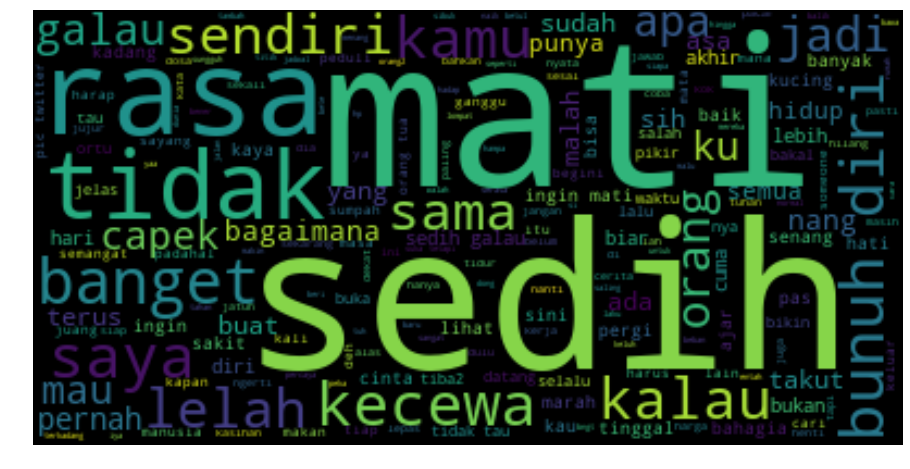

In [19]:
plot_word_cloud(data[data['is_depressed'] == True]['cleaned'])

## Word Cloud untuk Tweet yang Terdeteksi Healthy (Tidak Depresi)

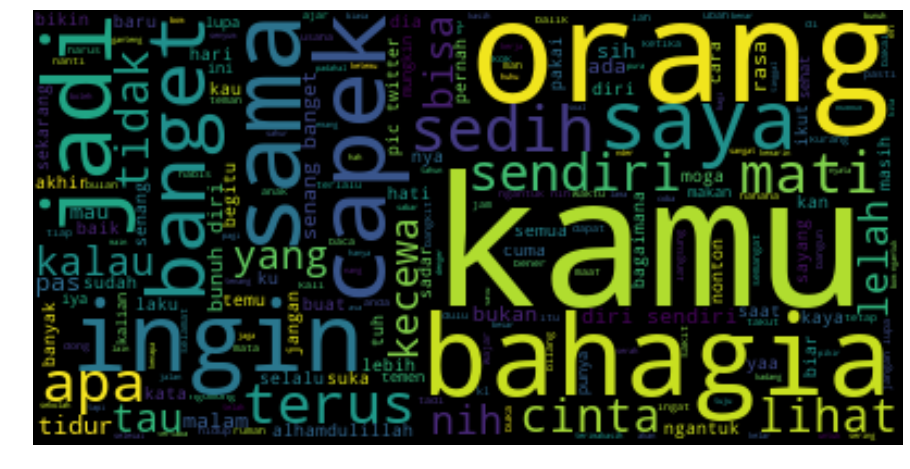

In [20]:
plot_word_cloud(data[data['is_depressed'] == False]['cleaned'])

## 3. Feature Extraction

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

def extract_tf_idf(tweet_list):
    vectorizer = TfidfVectorizer(max_features=2000, min_df=5,) # inisiasi fungsi TF IDF vectorizer
    tfidf_matrix = vectorizer.fit_transform(np.array(tweet_list)).toarray()
    return tfidf_matrix

def extract_bag_of_words(tweet_list):
    vectorizer = CountVectorizer(max_features=2000, min_df=3, max_df=0.7)  
    return vectorizer.fit_transform(np.array(tweet_list)).toarray()

## 4. Classification

In [27]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier

def classify(feature, label):
    classifiers = [
        KNeighborsClassifier(3),
        DecisionTreeClassifier(),
        LinearSVC()
    ]
    for classifier in classifiers:
        scores = cross_val_score(classifier, feature, label, cv=10)
        print("="*30)
        print(classifier.__class__.__name__)
        print('****Results****')
        print("Accuracy: %f (+/- %.2f)" % (scores.mean(), scores.std() * 2))
        print("="*30 + "\n")

In [28]:
classify(extract_tf_idf(cleaned), data['is_depressed'])

KNeighborsClassifier
****Results****
Accuracy: 0.621993 (+/- 0.31)

DecisionTreeClassifier
****Results****
Accuracy: 0.577039 (+/- 0.35)

LinearSVC
****Results****
Accuracy: 0.702011 (+/- 0.27)



In [29]:
classify(extract_bag_of_words(cleaned), data['is_depressed'])

KNeighborsClassifier
****Results****
Accuracy: 0.603355 (+/- 0.25)

DecisionTreeClassifier
****Results****
Accuracy: 0.624826 (+/- 0.26)

LinearSVC
****Results****
Accuracy: 0.688790 (+/- 0.32)

